In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import bokeh as bk

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
[Errno 2] No such file or directory: '/gdrive'
/content


In [0]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [0]:
# mydateparser = lambda x: pd.datetime()
prices_df = pd.read_csv('example_sprit_cut_prices.csv', sep =';') # , parse_dates=[4] , date_parser = mydateparser )
stations_df = pd.read_csv('example_sprit_cut_station.csv', sep =';')

In [0]:
prices_df['DATE_CHANGED'] = pd.to_datetime(prices_df['DATE_CHANGED'])

In [0]:
prices_df.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21


In [0]:
stations_df.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


# Cleaning of data

*# Station data*
 

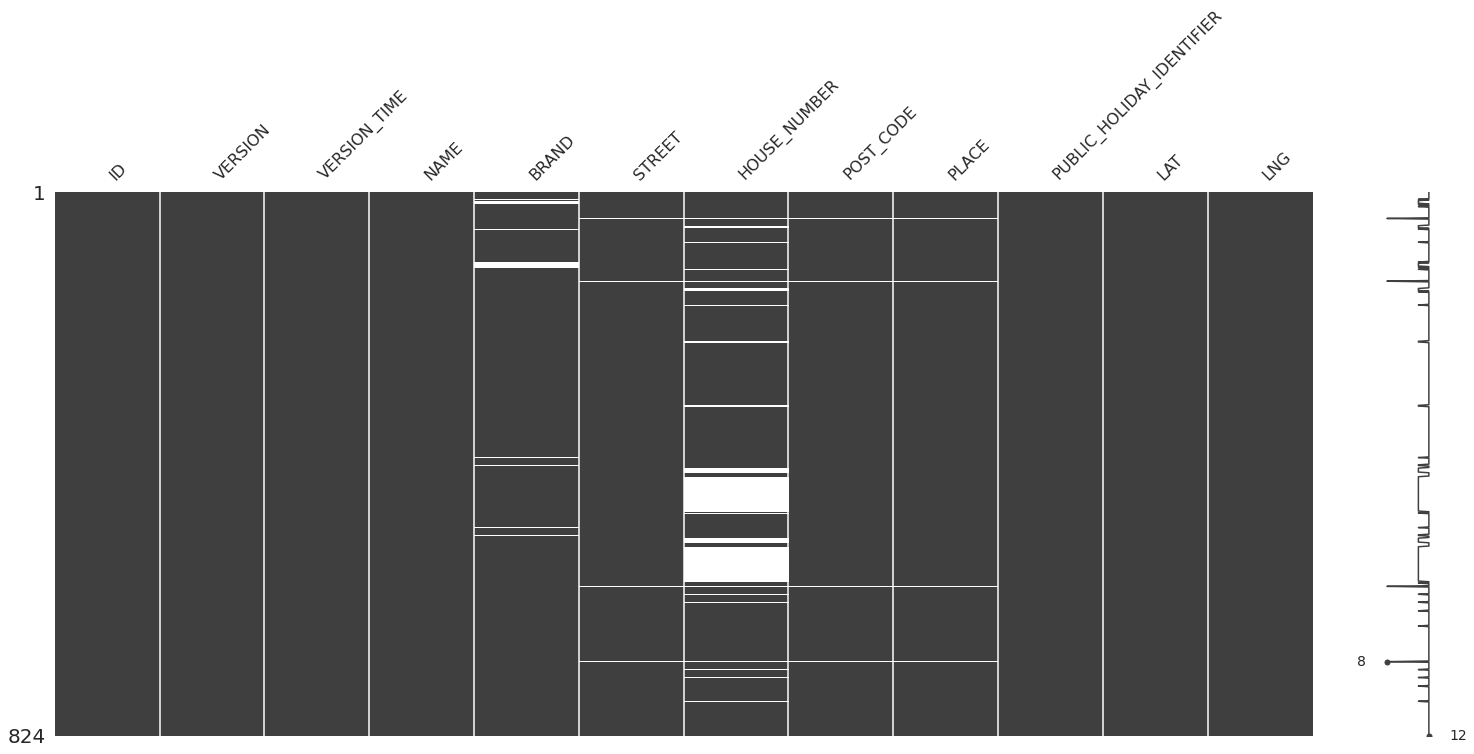

In [0]:
msno.matrix(stations_df)

In [0]:
stations_df.drop_duplicates(inplace=True)

In [0]:
# drop non-essential columns
columns_drop = ['VERSION','VERSION_TIME','HOUSE_NUMBER','PUBLIC_HOLIDAY_IDENTIFIER']
stations_df.drop(columns_drop, inplace=True, axis=1)

In [0]:
stations_df.isnull().any()

ID           False
NAME         False
BRAND         True
STREET        True
POST_CODE     True
PLACE         True
LAT          False
LNG          False
dtype: bool

In [0]:
stations_df['BRAND'].unique()

array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', nan,
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA',
       'nicht mehr aktiv', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt', '\\N',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [0]:
null_data = stations_df[stations_df.isnull().any(axis=1)]
null_data

,ID,NAME,BRAND,STREET,POST_CODE,PLACE,LAT,LNG
11,2b690d89-9d37-4e3a-aebb-7de05f06139e,Oel-Huff GmbH Stefan Rudolph,NaN,Weinstraße,67480,Edenkoben,49.278330,8.119580
13,698f398d-bd57-4684-be70-ea76c2cbf491,Dudenhöffer & Rung GmbH,NaN,Am Kleinwald,76863,Herxheim,49.138500,8.230990
14,400ce1d0-e095-47dd-a0fc-6073edd7c8d2,Globus Handelshof GmbH & Co.KG Betriebsstätte ...,NaN,Oderstraße,67061,Ludwigshafen-Oggersheim,49.486640,8.349300
15,7c5aca0f-b8e4-478e-9afb-46c2c136ae4e,Globus Handelshof GmbH & Co. KG Betriebsstätt...,NaN,Merkurstr.,67663,Kaiserslautern,49.441270,7.710134
16,ba10c89e-d2f8-46d9-8ec5-6060bc32e89a,Globus Handelshof GmbH & Co. KG Betriebsstätte...,NaN,Daimlerstr.,67269,Grünstadt,49.557630,8.182250
17,8e04a261-815f-43f8-a5ba-20d12c5b3273,Globus Handelshof GmbH & Co. KG Betriebsstätt...,NaN,Frankenthaler Str.,67240,Bobenheim-Roxheim,49.587580,8.355910
19,2312e195-7079-4b95-b370-d220fa7e3cbd,Globus Handelshof GmbH & Co. KG Betriebsstätte...,NaN,Adolf-Kolping-Straße,67433,Neustadt,49.339077,8.160396
40,a21e3ed2-6d03-478f-32a3-9f33202182bc,Landau,AUTO ZOTZ Landau in der Pfalz Tanken und was...,NaN,NaN,NaN,49.207778,8.135870
56,00060562-0001-4444-8888-acdc00000001,Tankcenter Ziehl,NaN,Carl-Benz Str.,67227,Frankenthal,49.543491,8.336738
402,00060062-0001-4444-8888-acdc00000001,Autohaus Holz GmbH Landau,NaN,Hainbachstraße,76829,Landau,49.206730,8.124839


In [0]:
# drop inactive station
stations_df = stations_df.loc[stations_df['BRAND'] != 'nicht mehr aktiv']

# look for "\\N" Brand 
stations_df.loc[stations_df['BRAND'] == '\\N']

# change street to unkown if nan
stations_df['STREET'] = stations_df['STREET'].fillna("UNKOWN")

In [0]:

# Change BRAND name based on station name
stations_df.loc[stations_df['NAME'] .str.startswith('Globus', na=False), 'BRAND'] = 'Globus Handelshof GmbH & Co.KG '
stations_df.loc[stations_df['NAME'] .str.startswith('Tankcenter Ziehl', na=False), 'BRAND'] = 'Tankcenter Ziehl'
stations_df.loc[stations_df['NAME'] .str.startswith('Autohaus Holz ', na=False), 'BRAND'] = 'Autohaus Holz GmbH'

#from BRAND = "//N" 
stations_df.loc[stations_df['NAME'] .str.startswith('SBK', na=False), 'BRAND'] = 'SBK Tankstelle'
stations_df.loc[stations_df['NAME'] .str.startswith('Eberhardt', na=False), 'BRAND'] = "Eberhardt"

# change Auto Zotz from landau
stations_df.loc[stations_df['NAME'] .str.startswith('Landau', na=False), 'NAME'] = 'Auto Zotz Landau'

# change postal code for above one
stations_df.loc[stations_df['ID']=="a21e3ed2-6d03-478f-32a3-9f33202182bc", ['POST_CODE', 'PLACE']] = 76829, 'Landau'
stations_df.loc[stations_df['ID']=="e69a923a-ba11-409b-2720-2b908ed66498", ['POST_CODE', 'PLACE']] = 76863, 'Herxheim'

# duplicate name
stations_df.loc[stations_df['ID']=="00060562-0001-4444-8888-acdc00000001", 'BRAND'] = 'Tankcenter'


In [0]:
# replace duplicate brand names with single
stations_df.replace({'BRAND' : {"^Supermarkt.*" : "Supermarkt Tankstelle", 
      "^Freie.*" : "Freie Tankstelle",
                            "^bft.*" : "BFT", "^Bft.*" : "BFT",
                            "^AUTO ZOTZ.*" : "Auto Zotz",
                            "^Raiffeisen.*" : "Raiffeisen Tankstelle",
                            "^Eberhardt.*"  : "Eberhardt",
                            "^SB.*": "SB-Markttankstelle" } }, regex = True ,inplace =True)

In [0]:
stations_df['BRAND'].unique()

array(['ARAL', 'JET', 'Supermarkt Tankstelle', 'Tankhof Iffezheim',
       'Schiffer & Nicklaus GmbH', nan, 'Sefrin Heizöl & Kraftstoffe',
       'Globus Handelshof GmbH & Co.KG ', 'BFT', 'Markant', 'AVIA',
       'Freie Tankstelle', 'Auto Zotz', 'HEM', 'Fritz Walter GmbH',
       'TAMOIL', 'rnt', 'Eberhardt', 'Schuster & Sohn KG',
       'Raiffeisen Tankstelle', 'Tankcenter', 'E Center', 'Agip',
       'Winkler', 'Mr. Wash Autoservice AG', 'ESSO',
       'ZG Raiffeisen Energie', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Preis', 'mtb', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH',
       'OIL!', 'Autohaus Holz GmbH', 'SB-Markttankstelle', 'TOTAL', 'ED',
       'Total', 'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [0]:
# if no brand name, replace it with 'No brand
stations_df['BRAND'].fillna(value='No Brand', inplace= True)

# then write to stationname
stations_df["BRAND"] = np.where(stations_df["BRAND"] == 'No Brand', stations_df['NAME'], stations_df["BRAND"] )
# stations_df.loc[stations_df['NAME']=='Oel-Huff GmbH Stefan Rudolph']

In [0]:
stations_df['BRAND'].unique()

array(['ARAL', 'JET', 'Supermarkt Tankstelle', 'Tankhof Iffezheim',
       'Schiffer & Nicklaus GmbH', 'Oel-Huff GmbH Stefan Rudolph',
       'Sefrin Heizöl & Kraftstoffe', 'Dudenhöffer & Rung GmbH',
       'Globus Handelshof GmbH & Co.KG ', 'BFT', 'Markant', 'AVIA',
       'Freie Tankstelle', 'Auto Zotz', 'HEM', 'Fritz Walter GmbH',
       'TAMOIL', 'rnt', 'Eberhardt', 'Schuster & Sohn KG',
       'Raiffeisen Tankstelle', 'Tankcenter', 'E Center', 'Agip',
       'Winkler', 'Mr. Wash Autoservice AG', 'ESSO',
       'ZG Raiffeisen Energie', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Preis', 'mtb', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH',
       'OIL!', 'Autohaus Holz GmbH', 'SB-Markttankstelle', 'TOTAL', 'ED',
       'Total', 'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

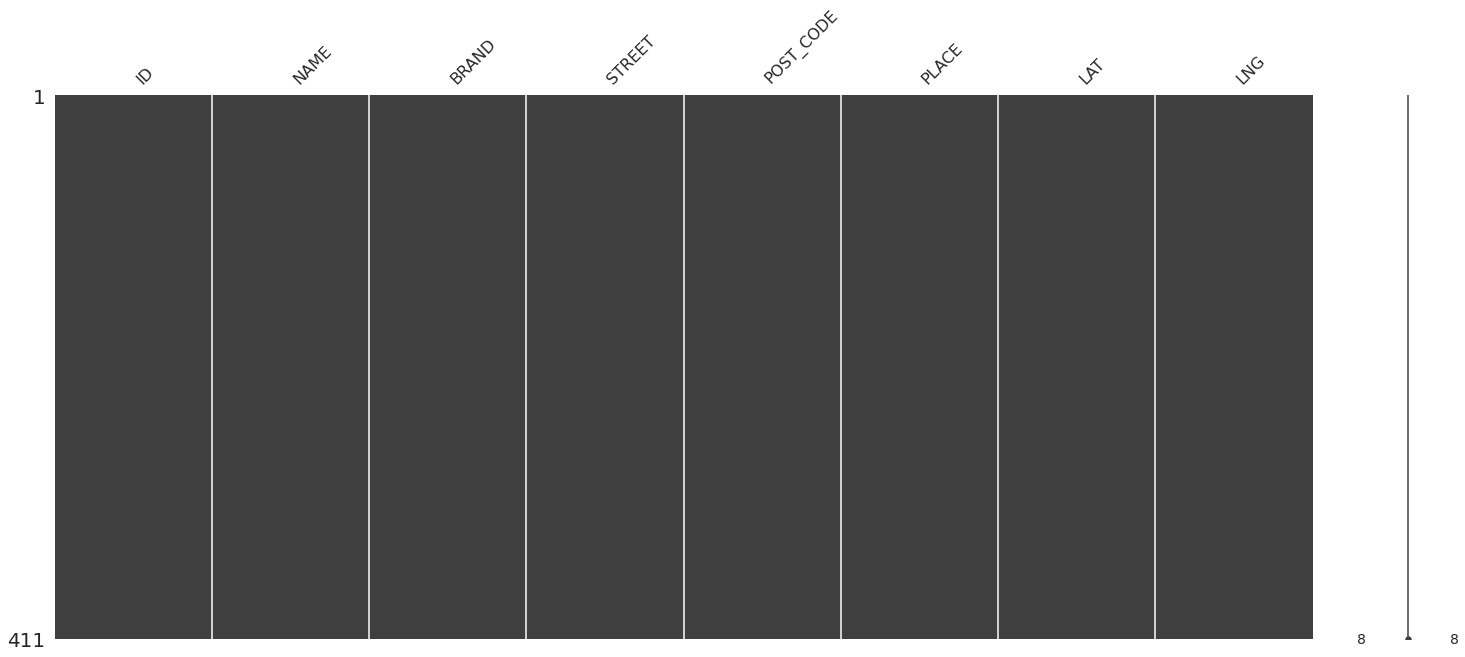

In [0]:
msno.matrix(stations_df)

price data

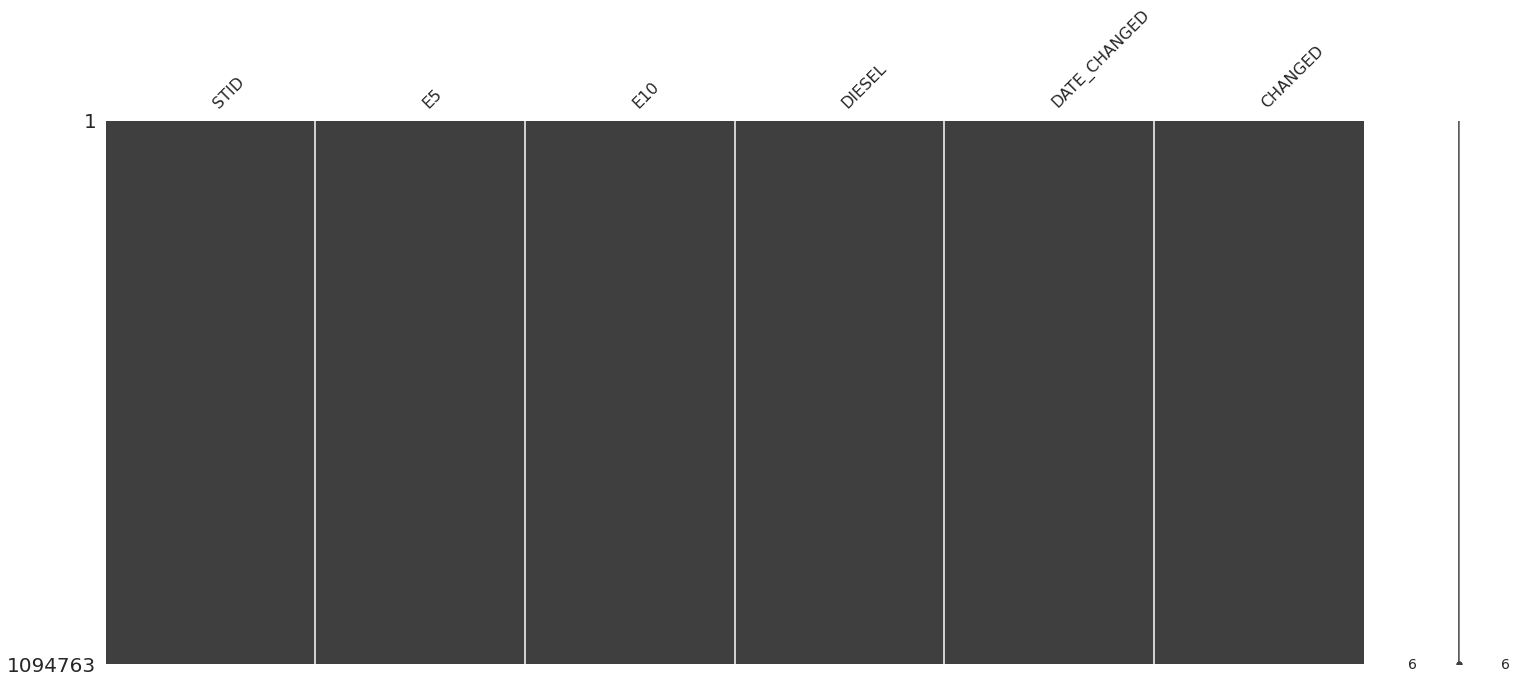

In [0]:
prices_df.drop_duplicates(inplace=True)
msno.matrix(prices_df)

In [0]:
prices_df.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21


In [0]:
prices_df.describe()

,E5,E10,DIESEL,CHANGED
count,1.094763e+06,1.094763e+06,1.094763e+06,1.094763e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091503e+02,2.116845e+02,1.037775e+02,8.031152e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [0]:
def remove_lower_price(df, col):
  df.drop(df[df[col] <= 0].index, inplace = True)
  
remove_lower_price(prices_df, 'E5')
remove_lower_price(prices_df, 'E10')
remove_lower_price(prices_df, 'DIESEL')

In [0]:
# replace inf values to nan
prices_df.replace([-np.inf, np.inf], np.nan).dropna(
                                  subset=["E5", "E10", "DIESEL"], how="all",inplace = True)

In [0]:
# normalization of prices

def normalize_prices(df, col, factor):
  """
  Normalize based on distribtuion. If value is below the threshold, replace with median value of column
  Arguments:
    dataframe, col_name, factor
  """
  mean, std = df[col].mean(), df[col].std()
  cut_off = std * factor
  lower_limit, upper_limit = mean - cut_off, mean + cut_off
  df[col] = np.where(np.logical_or(df[col] < lower_limit, df[col] > upper_limit), df[col].median(), df[col])
  return None

normalize_prices(prices_df, 'E5', 3)
normalize_prices(prices_df, 'E10', 3)
normalize_prices(prices_df, 'DIESEL', 3)


In [0]:
prices_df.describe()

,E5,E10,DIESEL,CHANGED
count,1.075425e+06,1.075425e+06,1.075425e+06,1.075425e+06
mean,1.456998e+03,1.429060e+03,1.247647e+03,1.900296e+01
std,1.010930e+02,9.693802e+01,9.944063e+01,7.726616e+00
min,1.148000e+03,1.139000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,1.769000e+03,1.719000e+03,1.549000e+03,6.300000e+01


In [0]:
# merge two files
combined_df = pd.merge(prices_df, stations_df, left_on='STID', right_on='ID')
combined_df.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,ID,NAME,BRAND,STREET,POST_CODE,PLACE,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,67551,WORMS,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,67551,WORMS,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1,01bf5a06-4248-43a5-9524-56123fa3ab2f,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,67551,WORMS,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,67551,WORMS,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21,01bf5a06-4248-43a5-9524-56123fa3ab2f,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,67551,WORMS,49.633409,8.273847


# Question 1:
How many different stations exist in the data set and what is the existing history
in days (bar chart)?

In [0]:
number_of_stations = len(stations_df['NAME'].unique())
number_of_brands = len(stations_df['BRAND'].unique())
print(f"There are {number_of_stations} stations belongs to {number_of_brands} different brands.")

There are 293 stations belongs to 48 different brands.


In [0]:
# For days histroy, the brands are consdiered
brand_groupby = combined_df.groupby('BRAND')['DATE_CHANGED']
start_date = brand_groupby.min().reset_index()
end_date = brand_groupby.max().reset_index()

# in days
histroy_days = (pd.to_datetime(end_date['DATE_CHANGED'])-pd.to_datetime(start_date['DATE_CHANGED']))
days = histroy_days.apply(lambda x: x.days)
end_date['available_days'] = days

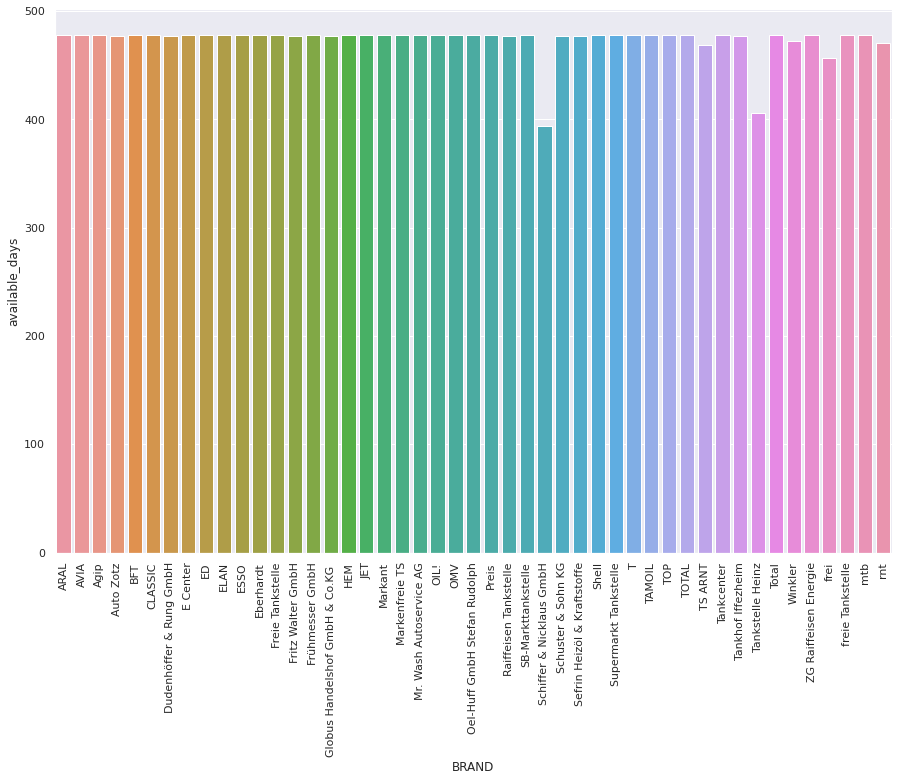

In [0]:
# plot no. of days vs Brand
fig, ax = plt.subplots(figsize =(15, 10))
bar_plot = sns.barplot(x= 'BRAND', y = 'available_days', data=end_date)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation = 90 );

# Question 2
What is the min, mean, max price for each gasoline type and station weekly (time
series graph)?

In [0]:
combined_df_idx = combined_df.set_index('DATE_CHANGED')
# price converson to (1/1000)
for name in ('E5','E10','DIESEL'):
  combined_df[name] = combined_df[name]/1000


In [0]:

# for mean, max, min price function
def fuel_info(df, fuel_name):
  plt.figure(figsize=(20,10))
  mean = df[fuel_name].resample('W').mean().plot(label = 'Mean')
  max = df[fuel_name].resample('W').max().plot(label = 'Max')
  min = df[fuel_name].resample('W').min().plot(label = 'Min')
  plt.legend()
  plt.xlabel("Weekly")
  plt.ylabel(" Euro  €")

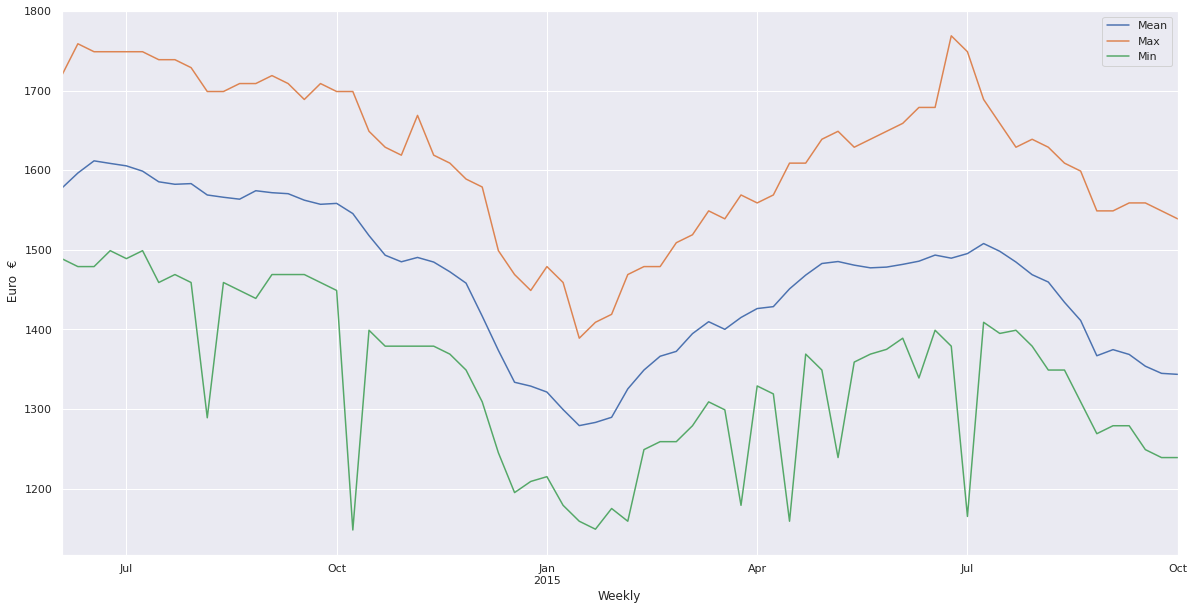

In [0]:
fuel_info(combined_df_idx, 'E5')

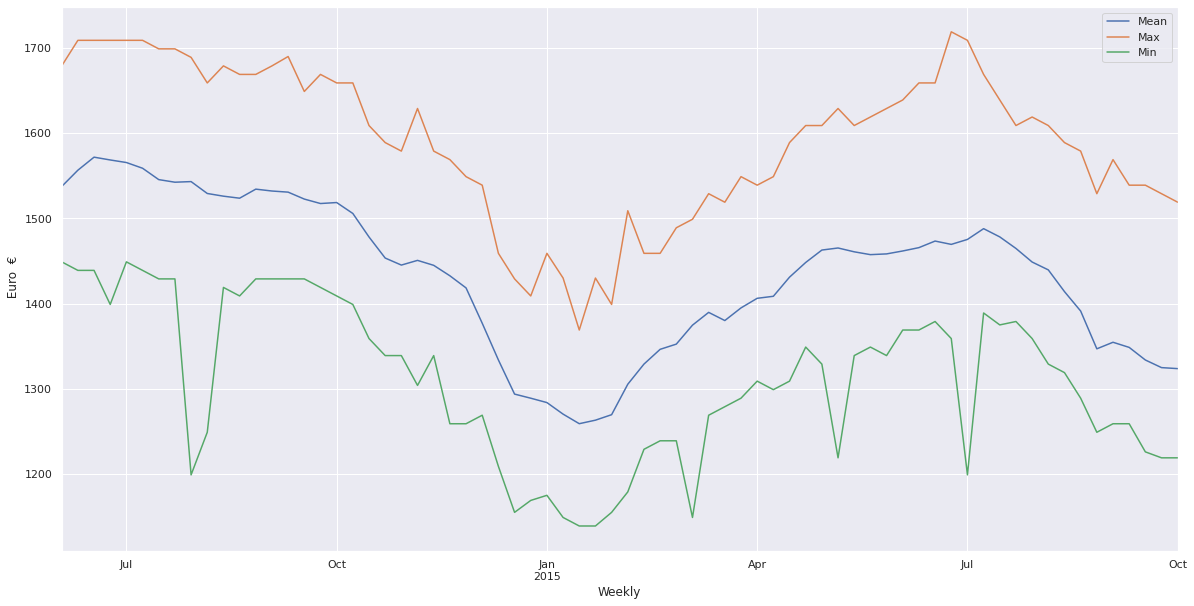

In [0]:
fuel_info(combined_df_idx, 'E10')

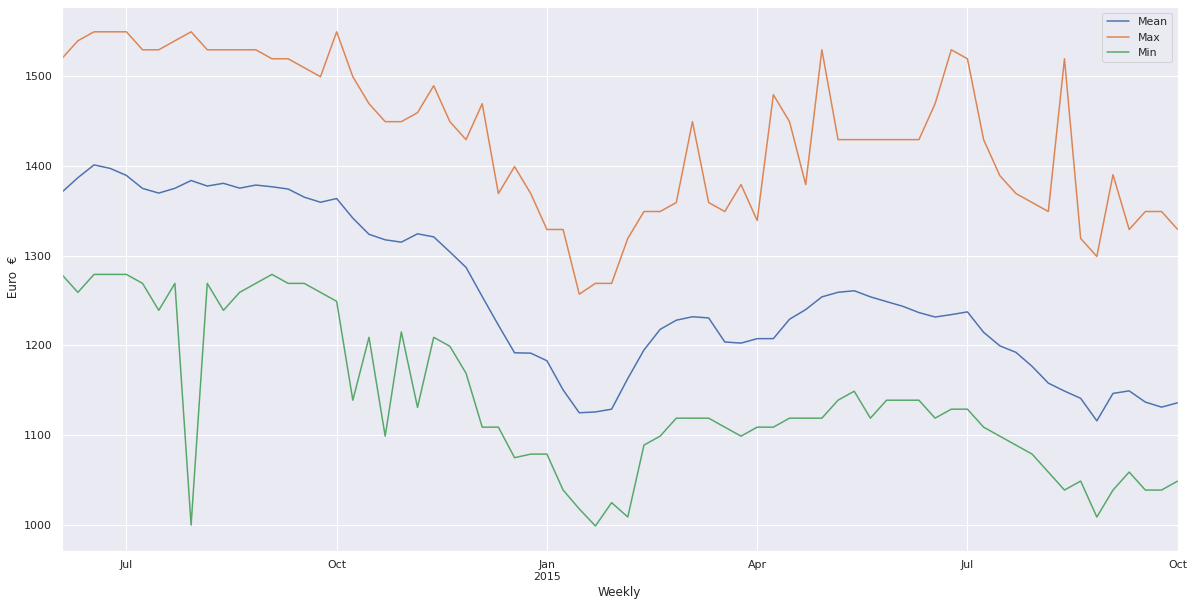

In [0]:
fuel_info(combined_df_idx, 'DIESEL')

# Question 3
What is cheapest station (in average) and why?

In [0]:
# grorp fuel wise
cheap_E5 = combined_df.groupby(['STID'])['E5'].min().sort_values().reset_index()
cheap_E10 = combined_df.groupby(['STID'])['E10'].min().sort_values().reset_index()
cheap_DIESEL = combined_df.groupby(['STID'])['DIESEL'].min().sort_values().reset_index()

# merge them
min_ = pd.merge(cheap_E5, cheap_E10)
cheaper_station = pd.merge(min_, cheap_DIESEL)

# find mean 3 fuel proces and save as new column
cheaper_station['mean'] = cheaper_station.mean(axis=1)

# get index of min STID
get_idx = cheaper_station['mean'].idxmin()
cheapest = cheaper_station.iloc[get_idx]['STID']

In [0]:
# station name
name = combined_df.loc[combined_df['STID'] == cheapest, 'NAME'].unique()
# brand name
brand = combined_df.loc[combined_df['STID'] == cheapest, 'BRAND'].unique()
print(f"The cheapest station (in average) is {name} belongs to {brand} brand.")

The cheapest station (in average) is ['Ludwigshafen Industriestr. 51'] belongs to ['HEM'] brand.


# Question 4
At which day of a week is the price most likely the cheapest (week profile)

In [0]:
week_avg = combined_df.groupby(combined_df.DATE_CHANGED.dt.day_name())['E5','E10','DIESEL'].mean()
week_avg['mean'] = week_avg.mean(axis=1)
# name
day_name_ = week_avg['mean'].idxmin()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


 The day of a week most likely the cheapest is on Saturday


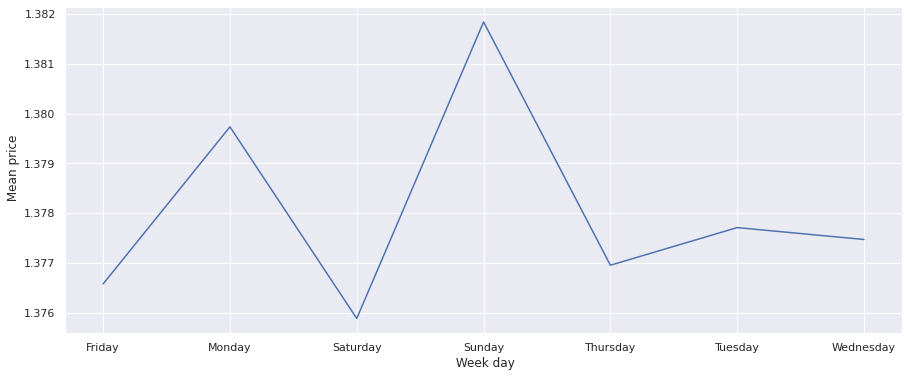

In [0]:
print(f" The day of a week most likely the cheapest is on {day_name_}")
plt.figure(figsize=(15,6))
week_avg['mean'].plot()
plt.xlabel(" Week day");
plt.ylabel(" Mean price");

# Question 5
At which hour during a day is the price the cheapest in average (hour profile)?

In [0]:
hour_avg = combined_df.groupby(combined_df.DATE_CHANGED.dt.hour)['E5','E10','DIESEL'].mean()

# mean
hour_avg['mean'] = hour_avg.mean(axis= 1)

get_hour = hour_avg['mean'].idxmin()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


 The hour of a day most likely the cheapest is on 18 hrs


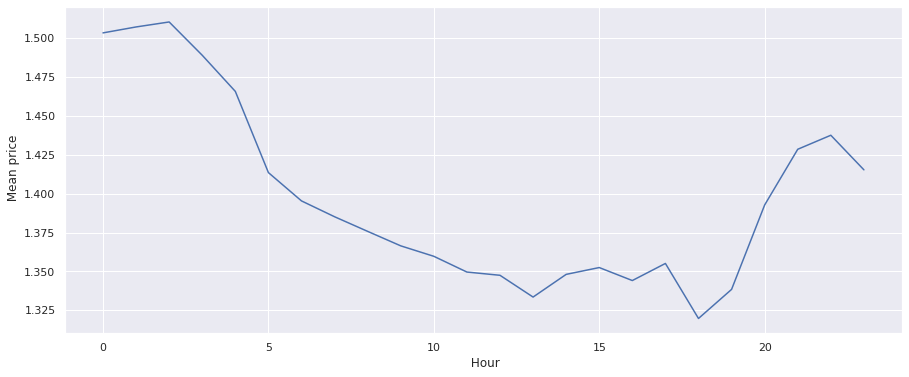

In [0]:
print(f" The hour of a day most likely the cheapest is on {get_hour} hrs")
plt.figure(figsize=(15,6))
hour_avg['mean'].plot()
plt.xlabel(" Hour");
plt.ylabel(" Mean price");

# Question 6
How many different station locations are present in the data (visualize via a map)?

# Question 7
What is the gas station which has most price data points, choose one and draw
the time series for all 3 gasonline types?

In [0]:
station = combined_df.groupby('STID').E5.count().sort_values(ascending = False).idxmax()


'5374ea5c-bf3e-4b0a-8504-049368adcdba'

# Question 8
At which hour during a day do we have the most price changes?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


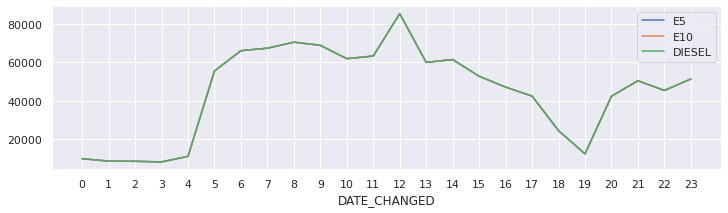

In [0]:
price_change = combined_df.groupby(combined_df.DATE_CHANGED.dt.hour)['E5','E10','DIESEL'].count()
p =price_change.E5.idxmax()
price_change.plot(figsize=(12,3), xticks = range(0, 24));

In [0]:
print(f" Most price changes are at {p} hr.")

 Most price changes are at 12 hr.


# Question 9
Select 20 gas stations having the longest time history and visualize the average
price per month. Use heatmap and only the prices between 12:00-13:00 of e10
and diesel

In [0]:
# looked into brands rathe rthan stations
end_date

,BRAND,DATE_CHANGED,available_days
0,ARAL,2015-09-29 23:02:01,478
1,AVIA,2015-09-29 23:34:01,478
2,Agip,2015-09-29 23:06:01,478
3,Auto Zotz,2015-09-29 17:42:01,477
4,BFT,2015-09-29 23:30:01,478
5,CLASSIC,2015-09-29 20:10:01,478
6,Dudenhöffer & Rung GmbH,2015-09-29 23:26:01,477
7,E Center,2015-09-29 22:06:01,478
8,ED,2015-09-29 23:10:01,478
9,ELAN,2015-09-29 22:58:01,478


In [0]:
group = end_date.groupby('available_days')
max_idx = group['BRAND'].count().idxmax()

# top 20
top_twenty = (group.get_group(max_idx)['BRAND'][:20]).to_list()

In [0]:
top_twenty

['ARAL',
 'AVIA',
 'Agip',
 'BFT',
 'CLASSIC',
 'E Center',
 'ED',
 'ELAN',
 'ESSO',
 'Eberhardt',
 'Freie Tankstelle',
 'Frühmesser GmbH',
 'HEM',
 'JET',
 'Markant',
 'Markenfreie TS',
 'Mr. Wash Autoservice AG',
 'OIL!',
 'OMV',
 'Oel-Huff GmbH Stefan Rudolph']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False